In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

In [2]:
# Load data
Employee_Details = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', header=0, low_memory="FALSE")

In [3]:
# List of columns
Employee_Details.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [4]:
# Removing columns with redundant information & collinear 
Employee_Details = Employee_Details.drop(['EmployeeCount', 'EmployeeNumber','Over18', 
                                          'StandardHours'], axis=1)

In [5]:
# View the data
Employee_Details.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [6]:
# Creating dummy variables for categorical varaibles 
cat_vars=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(Employee_Details[var], prefix=var)
    datanew=Employee_Details.join(cat_list)
    Employee_Details=datanew

In [7]:
# Removing categorical main columns 
Employee_Details = Employee_Details.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                                          'JobRole', 'MaritalStatus', 'OverTime'], axis=1)

In [8]:
# Removing one column for all categorical variables 
Employee_Details = Employee_Details.drop(['BusinessTravel_Non-Travel','Department_Human Resources','Gender_Female',
                                          'EducationField_Human Resources','JobRole_Healthcare Representative',
                                          'MaritalStatus_Divorced','OverTime_No'], axis=1)

In [9]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = 'Attrition'
print(get_VIF(Employee_Details,target))

const                                445.117396
Age                                    2.083223
DailyRate                              1.034936
DistanceFromHome                       1.022804
Education                              1.083566
EnvironmentSatisfaction                1.030079
HourlyRate                             1.026771
JobInvolvement                         1.032524
JobLevel                              14.140113
JobSatisfaction                        1.024957
MonthlyIncome                         18.122028
MonthlyRate                            1.021505
NumCompaniesWorked                     1.282276
PercentSalaryHike                      2.564485
PerformanceRating                      2.550475
RelationshipSatisfaction               1.027607
StockOptionLevel                       1.913844
TotalWorkingYears                      5.012645
TrainingTimesLastYear                  1.036643
WorkLifeBalance                        1.029390
YearsAtCompany                         4

In [10]:
# Splitting the columns to X and y 
X = Employee_Details.loc[:, Employee_Details.columns != 'Attrition']
y = Employee_Details['Attrition'].replace({'Yes': 1, 'No': 0})

In [11]:
# Removing the columns with VIF greater than 10 for Decision Trees
X = X.drop(['JobLevel',
'EducationField_Life Sciences',
'EducationField_Marketing',
'EducationField_Medical',
'EducationField_Other',
'EducationField_Technical Degree'], axis=1)

In [12]:
# Running the logistic model for selecting the final input variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.296594
         Iterations 8
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.329     
Dependent Variable:       Attrition             AIC:                   947.9871  
Date:                     2021-04-22 10:16      BIC:                   1149.1218 
No. Observations:         1470                  Log-Likelihood:        -435.99   
Df Model:                 37                    LL-Null:               -649.29   
Df Residuals:             1432                  LLR p-value:           9.6493e-68
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           8.0000                                                 
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------

In [13]:
# Removing the variables with high p-values
X = X.drop(['PercentSalaryHike', 'PerformanceRating'], axis=1)

# Running the model again for significant variables
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.296771
         Iterations 8
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.328     
Dependent Variable:       Attrition             AIC:                   944.5065  
Date:                     2021-04-22 10:16      BIC:                   1135.0551 
No. Observations:         1470                  Log-Likelihood:        -436.25   
Df Model:                 35                    LL-Null:               -649.29   
Df Residuals:             1434                  LLR p-value:           1.0010e-68
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           8.0000                                                 
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------

In [14]:
# Training the model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression(max_iter=6000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=6000)

In [15]:
# Predicting the 'response variable' y using the Logistic Regression
y_pred = logreg.predict(X_test)
print('Accuracy (Logistic Regression): {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy (Logistic Regression): 0.8980


In [16]:
# Displaing the Confusion Matrix - Logistic Regression
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[242   3]
 [ 27  22]]


In [17]:
# Displaying the Logistic Regression model statistics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       245
           1       0.88      0.45      0.59        49

    accuracy                           0.90       294
   macro avg       0.89      0.72      0.77       294
weighted avg       0.90      0.90      0.88       294



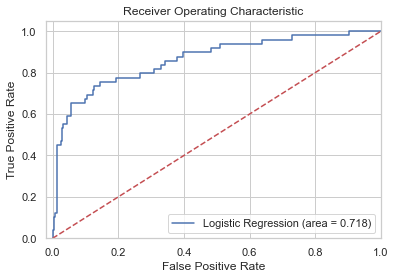

In [18]:
# Displaying the ROC-AUC - Logistic Regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Logistic_ROC')
plt.show()

In [19]:
# Performing the kfold validation for robustness
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(logreg, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 87.89% (1.99%)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


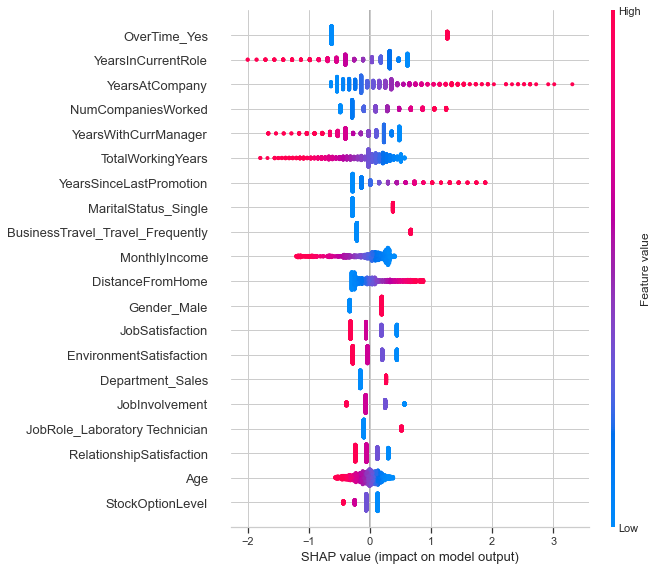

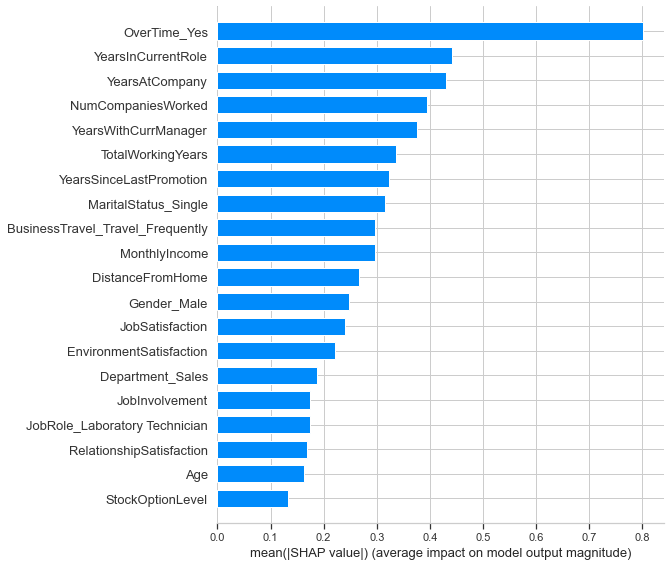

In [20]:
# Validating the impact of the features on the response variable
model = sklearn.linear_model.LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

import shap
shap.initjs()
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [21]:
# Splitting the columns to X and y again for Decision Trees
X = Employee_Details.loc[:, Employee_Details.columns != 'Attrition']
y = Employee_Details['Attrition'].replace({'Yes': 1, 'No': 0})

In [22]:
# Removing the columns with VIF greater than 10 for Decision Trees
X = X.drop(['JobLevel',
'MonthlyIncome',
'Department_Research & Development',
'Department_Sales',
'EducationField_Life Sciences',
'EducationField_Marketing',
'EducationField_Medical',
'EducationField_Other',
'EducationField_Technical Degree',
'JobRole_Human Resources',
'JobRole_Laboratory Technician',
'JobRole_Manager',
'JobRole_Manufacturing Director',
'JobRole_Research Director',
'JobRole_Research Scientist',
'JobRole_Sales Executive',
'JobRole_Sales Representative'], axis=1)

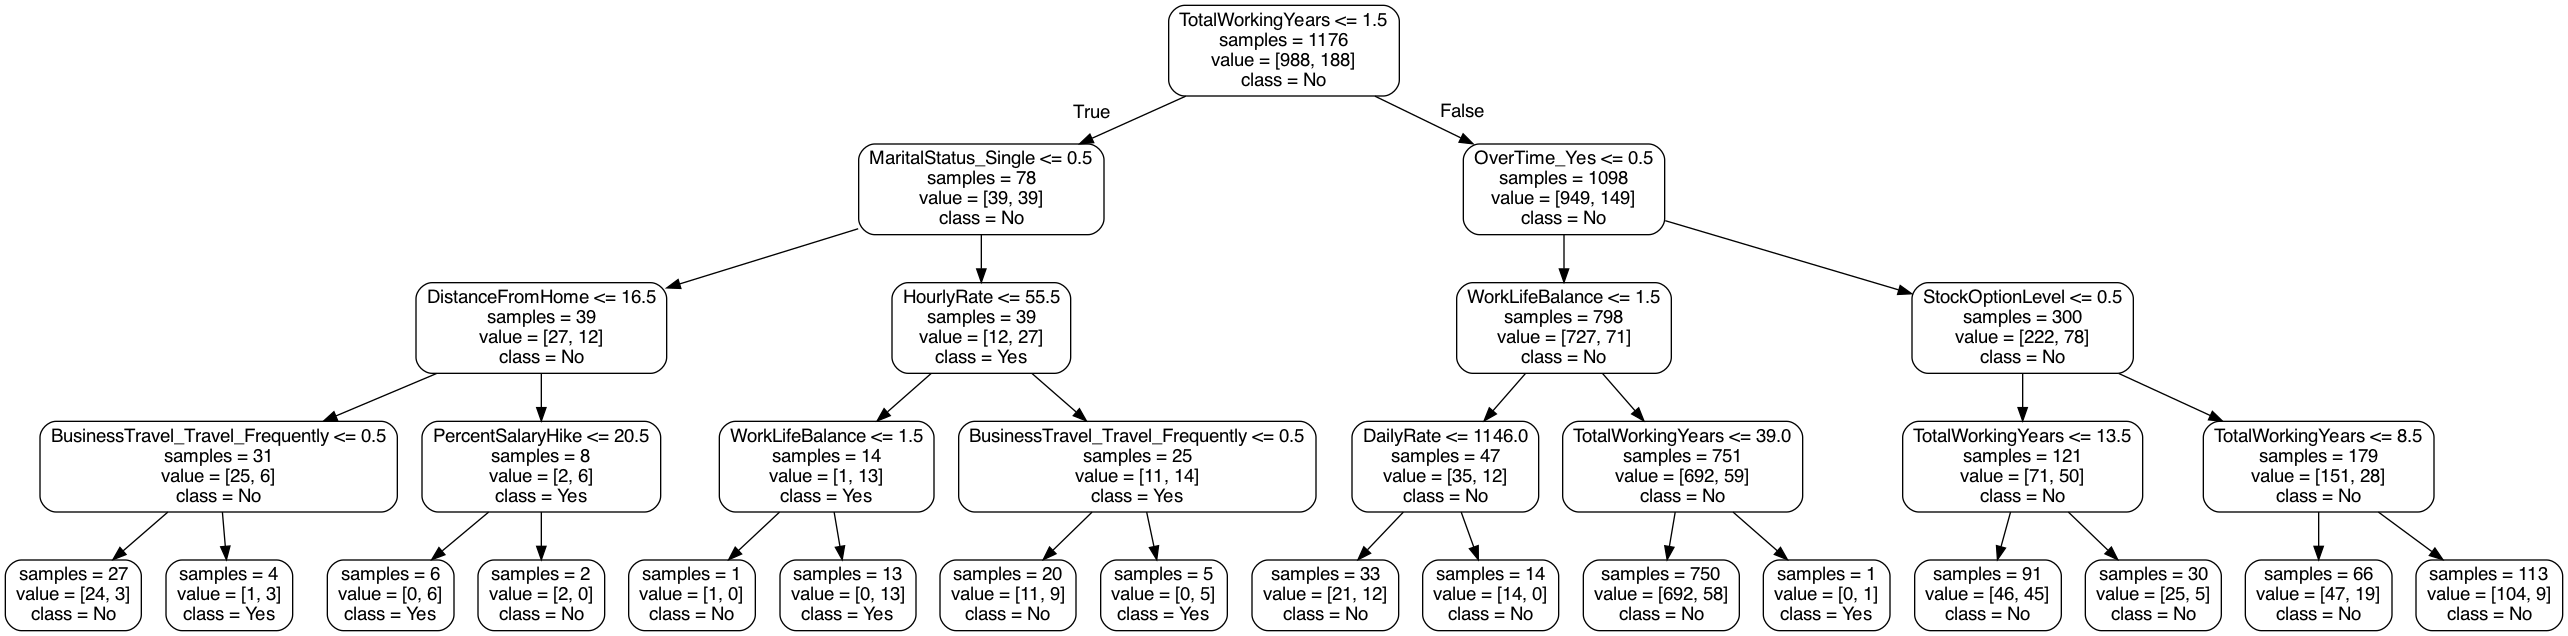

In [23]:
# Decision Tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

decision_tree = tree.DecisionTreeClassifier(max_depth = 4,random_state=0)
decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
y_pred2 = decision_tree.predict(X_test)
dt_feature_names = list(X_test.columns)


# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = dt_feature_names,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= False)
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=10000, width=2000)

#tree.export_graphviz(clf, out_file=dot_data, feature_names=vec.get_feature_names()) 


In [24]:
score = decision_tree.score(X_test, y_test)
print(score)

0.8333333333333334


In [25]:
#selecting max depth

# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

    
    
accuracy

[0.8333333333333334,
 0.8299319727891157,
 0.8299319727891157,
 0.8333333333333334,
 0.8163265306122449,
 0.8163265306122449,
 0.8027210884353742,
 0.8163265306122449,
 0.8095238095238095]

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[243   2]
 [ 47   2]]


In [27]:
# Displaying the Logistic Regression model statistics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       245
           1       0.50      0.04      0.08        49

    accuracy                           0.83       294
   macro avg       0.67      0.52      0.49       294
weighted avg       0.78      0.83      0.77       294



In [28]:
# Displaying the ROC-AUC - Decision Tree
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred2))

roc_auc_score for DecisionTree:  0.5163265306122449


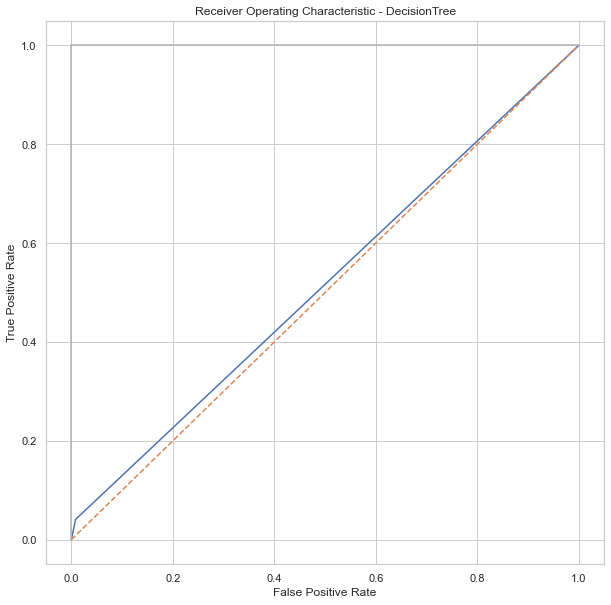

In [29]:
# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
#Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
14,TotalWorkingYears,0.371
26,OverTime_Yes,0.161
13,StockOptionLevel,0.120
25,MaritalStatus_Single,0.073
21,BusinessTravel_Travel_Frequently,0.066
16,WorkLifeBalance,0.058
2,DistanceFromHome,0.050
10,PercentSalaryHike,0.038
1,DailyRate,0.033
5,HourlyRate,0.031


In [31]:
decision_tree.tree_.node_count

31

In [32]:
# Random Forest Model
# Import the dataset again 
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', header=0, low_memory="FALSE")

In [33]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
# Random Forest 
# Data Cleaning and Preprocessing

# Drop variables with just one value or probably unimportant
# Income already accounted for with variable 'MonthlyIncome'

data1 = data.drop(['DailyRate','MonthlyRate','EmployeeCount','EmployeeNumber','Over18','StandardHours'],1)

In [35]:
# Data Preprocessing - Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_var = data1[['BusinessTravel','Department','EducationField','Attrition','Gender','JobRole','MaritalStatus','OverTime']].apply(le.fit_transform)

In [36]:
for i in cat_var:
    data1[i] = cat_var[i]

In [37]:
# Split between independent and dependent variables
# Use all potentially important variables

x = data1.drop('Attrition',1)
y = data1['Attrition']

In [38]:
len(y[y==1])/len(y)

0.16122448979591836

16% of the employees left. This is a scenario of imbalanced data.

In [39]:
#Upsample data with SMOTE
oversample_50 = SMOTE(sampling_strategy=1, random_state=0)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train50, y_train50 = oversample_50.fit_resample(X_train, y_train)

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sel50 = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel50.fit(X_train50, y_train50)

sel50.get_support()

array([ True, False, False,  True, False, False,  True, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
        True])

In [42]:
# Reveal the important features

selected_feat50 = X_train50.columns[(sel50.get_support())]
print(selected_feat50)
len(selected_feat50)

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


12

In [43]:
x_sel50 = X_train50[(selected_feat50)]

In [44]:
x_sel50.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,24,21,3,57,2,1,2296,3,2,1,1,0
1,18,5,2,73,3,4,1051,0,0,0,0,0
2,29,20,4,45,3,4,6931,1,10,3,2,2
3,39,12,4,66,3,2,5295,0,7,5,4,0
4,31,20,2,89,3,3,4197,1,10,10,8,2


In [45]:
rfc50 = RandomForestClassifier(n_estimators = 500)
rfc50.fit(X_train50,y_train50)

RandomForestClassifier(n_estimators=500)

In [46]:
importances = rfc50.feature_importances_
x_columns = x_sel50.columns[0:]
indices = np.argsort(importances)[::-1]
#for f in range(x_sel50.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))

In [47]:
y_pred = rfc50.predict(X_test)
y_prob = rfc50.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_prob)
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

In [48]:
from sklearn.metrics import confusion_matrix

def roc_auc_plot(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

=============Confusion Matrix=============
[[246   9]
 [ 26  13]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.59      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.86      0.88      0.87       294

=============ROC AUC======================


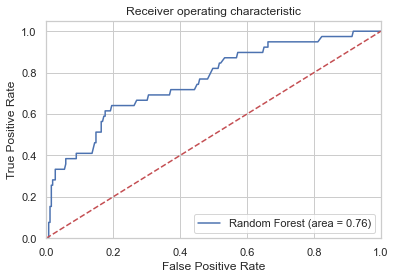

AUC: 0.7605832076420311


In [49]:
print("=============Confusion Matrix=============")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=============Key Metrics==================")
print(classification_report(y_test, y_pred))
print("=============ROC AUC======================")
roc_auc_plot(fpr, tpr, roc_auc) 
print('AUC:', roc_auc)